## Business Challenge
E-Shop Pro is facing:

- Shopping Cart Abandonment: High rates of customers adding items to their cart but not completing the purchase.

- Low Customer Retention: Many customers only make one purchase and do not return.

- Customer Churn: A significant number of customers stop engaging with the platform after a short period.

- Low Engagement: Customers interact less with the platform over time.

These challenges increase marketing costs and reduce Customer Lifetime Value (CLV), which negatively impacts business growth.

## Solution : Cohort analysis & Customer Segmentation

The project uses Cohort Analysis and Customer Segmentation to address the challenges.

### What is Cohort Analysis?
Cohort Analysis groups customers into "cohorts" based on a shared characteristic or behavior over a specific time period (e.g., customers who made their first purchase in a specific month). 
This helps:

- Track Retention Rates: See how many customers from a specific cohort remain active over time.
- Identify Churn Patterns: Understand when and why customers stop engaging.
- Evaluate Retention Strategies: Assess the impact of loyalty programs, personalized recommendations, or promotional campaigns.

### What is Customer Segmentation?
Using clustering algorithms like K-Means, customers will be grouped based on shared purchasing behavior. 
This helps:

- Understand Customer Behavior: Identify high-value customers, frequent buyers, or low-engagement users.
- Targeted Marketing Campaigns: Personalize offers and promotions for specific customer groups.
- Optimize Onboarding: Improve the post-purchase experience for certain segments.


**Retention Rate Time-Based Cohort Analysis:**

Retention rate time-based cohort analysis is a specialized form of cohort analysis that focuses on the retention of users over multiple time periods.

To perform retention rate time-based cohort analysis, you would typically:

- Create cohorts based on user acquisition dates.

- Measure the percentage of users from each cohort who continue to engage with your product or service over time (e.g., after 1 month, 3 months, etc.).

- Analyze how retention rates vary across different cohorts and time periods, enabling you to identify trends and make df-driven decisions.

This analysis can reveal whether certain cohorts have better or worse retention rates, helping the business understand the factors contributing to user retention or attrition. It can also assist in optimizing marketing, product development, and customer support strategies.

## Objectives of the Project
- Conduct Retention Rate Cohort Analysis to measure how well customers are retained over time.
- Perform Customer Segmentation using clustering algorithms to understand customer behavior and purchasing patterns.
- Implement Version Control with Git and GitHub to track code changes and collaborate effectively.

# Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Amdari-Project-1-Cohort-Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Load and prepare dataset

In [147]:
# Load dataset

df = pd.read_csv("Dataset_ecommerce.csv")
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal


In [148]:
df.describe(include ="all")

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [149]:
df.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [151]:
# Drop missing columm
df = df.dropna().reset_index(drop=True)

#we can only track the activities of customers that are known (those with customerID)

In [153]:
df.shape

(406829, 8)

In [154]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [155]:
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
406824,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
406825,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
406826,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
406827,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal


# Exploratory data analysis

### Univariate Analysis

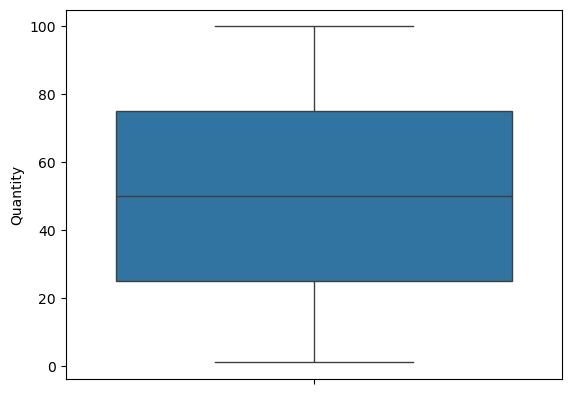

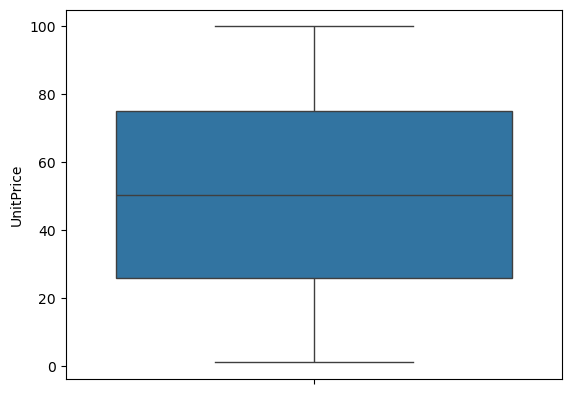

In [156]:
columns = ['Quantity', 'UnitPrice']
for i in columns:
    plt.figure()
    sns.boxplot(df[i])

Insights from the Plot:
The median unit price is around 50, which splits the data into two equal halves.
The data spread is fairly symmetrical, with no significant skewness.
There are no visible outliers, as no points fall outside the whiskers.
Most unit prices are concentrated in the range of 25 to 80, with relatively few very high or very low values.

## Bivariate Analysis 

**Bivariate analysis of countries and total number of purchase**

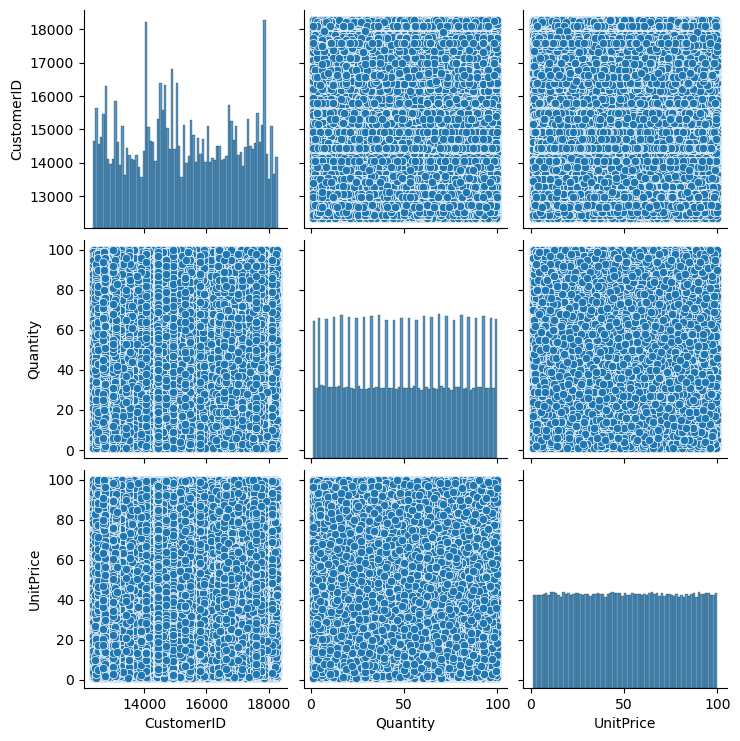

In [ ]:
#sns.pairplot(df)

In [163]:
quantity_per_country = df.groupby(["Country"])["Quantity"].sum().reset_index()
quantity_per_country = quantity_per_country.sort_values("Quantity", ascending = False).reset_index(drop=True)

In [172]:
quantity_per_country

,Country,Quantity
0,Togo,741223
1,South Africa,740589
2,Cote d'Ivoire,740229
3,Nigeria,739708
4,Libya,739206
5,Benin,738133
6,Zimbabwe,737522
7,Somalia,736219
8,Algeria,736181
9,Sierra Leone,735477


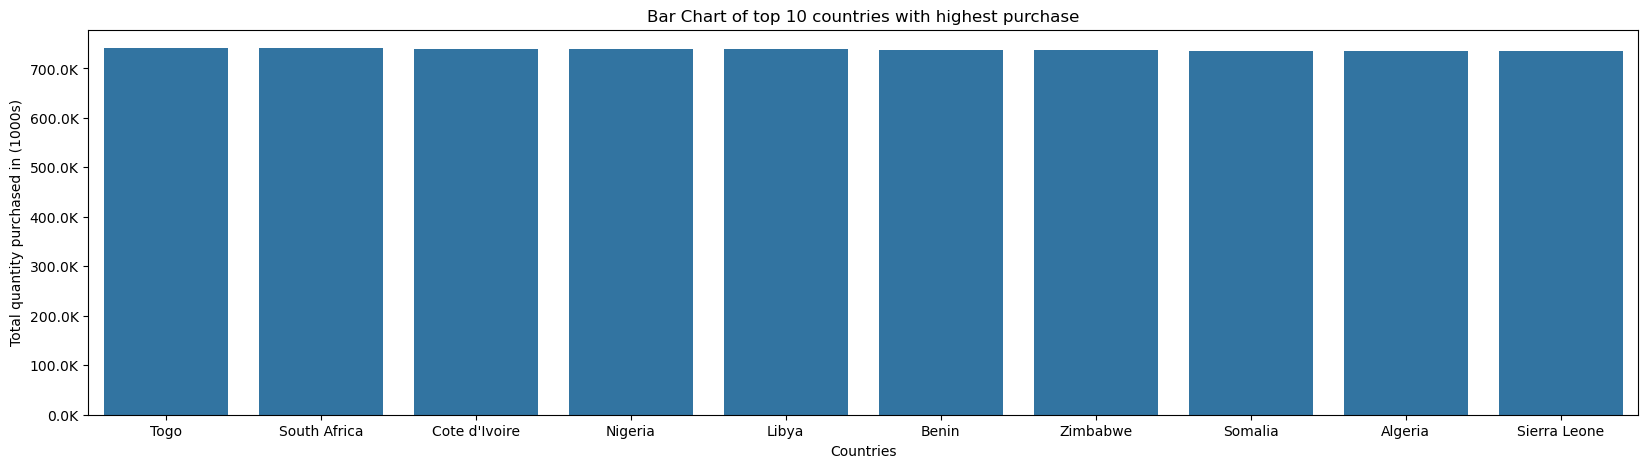

In [175]:
# Draw a plot of top 10 countries with highest number of quantity purchase
top_10_countries = quantity_per_country.head(10)

# Create a bar chart from the selected df
plt.figure(figsize=(20, 5))

y_format = FuncFormatter(lambda x, _: f'{x / 1000:.1f}K')
ax = sns.barplot(x='Country', y='Quantity', data= top_10_countries)
ax.yaxis.set_major_formatter(y_format)

plt.xlabel('Countries')
plt.ylabel('Total quantity purchased in (1000s)')
plt.title('Bar Chart of top 10 countries with highest purchase')
plt.show()

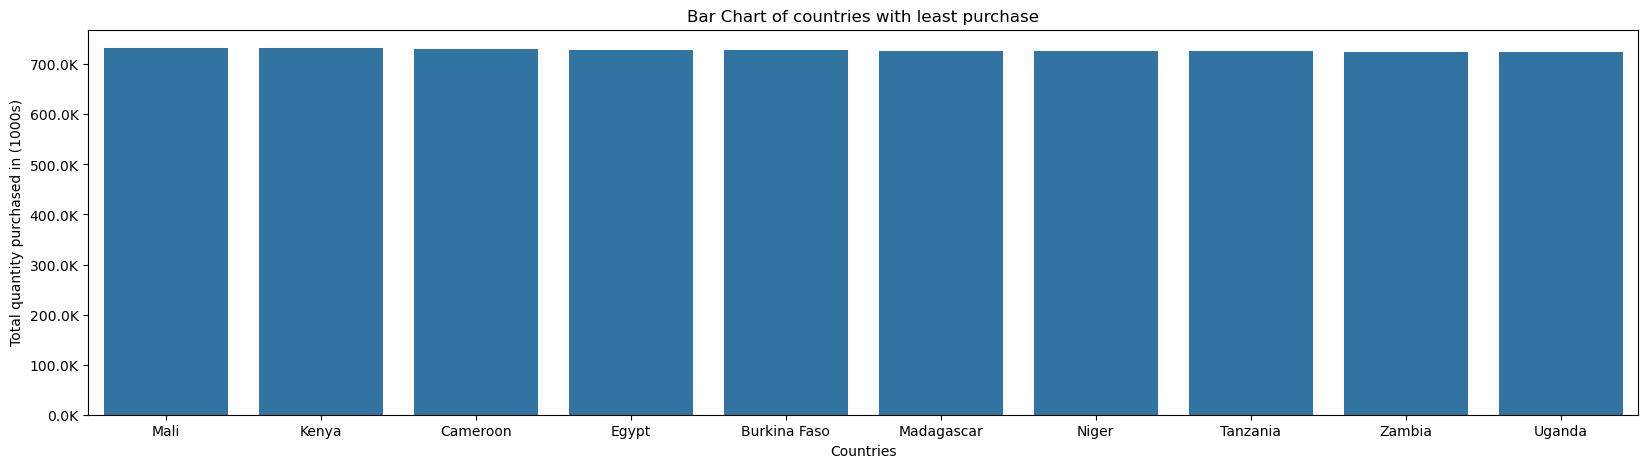

In [176]:
# Draw a plot of 10 countries with least number of quantity purchase
least_10_countries = quantity_per_country.tail(10)

# Create a bar chart from the selected df
plt.figure(figsize=(20, 5))

y_format = FuncFormatter(lambda x, _: f'{x / 1000:.1f}K')
ax = sns.barplot(x='Country', y='Quantity', data= least_10_countries)
ax.yaxis.set_major_formatter(y_format)

plt.xlabel('Countries')
plt.ylabel('Total quantity purchased in (1000s)')
plt.title('Bar Chart of countries with least purchase')
plt.show()

**Bivariate analysis of countries and number of customers**

In [177]:
country_to_customers = df.groupby(["Country"])["CustomerID"].nunique().reset_index()
country_to_customers = country_to_customers.sort_values("CustomerID", ascending = False).reset_index()
country_to_customers.rename(columns = {"CustomerID" : "Number of customers"}, inplace = True)

In [178]:
country_to_customers.head(3)

,index,Country,Number of customers
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053


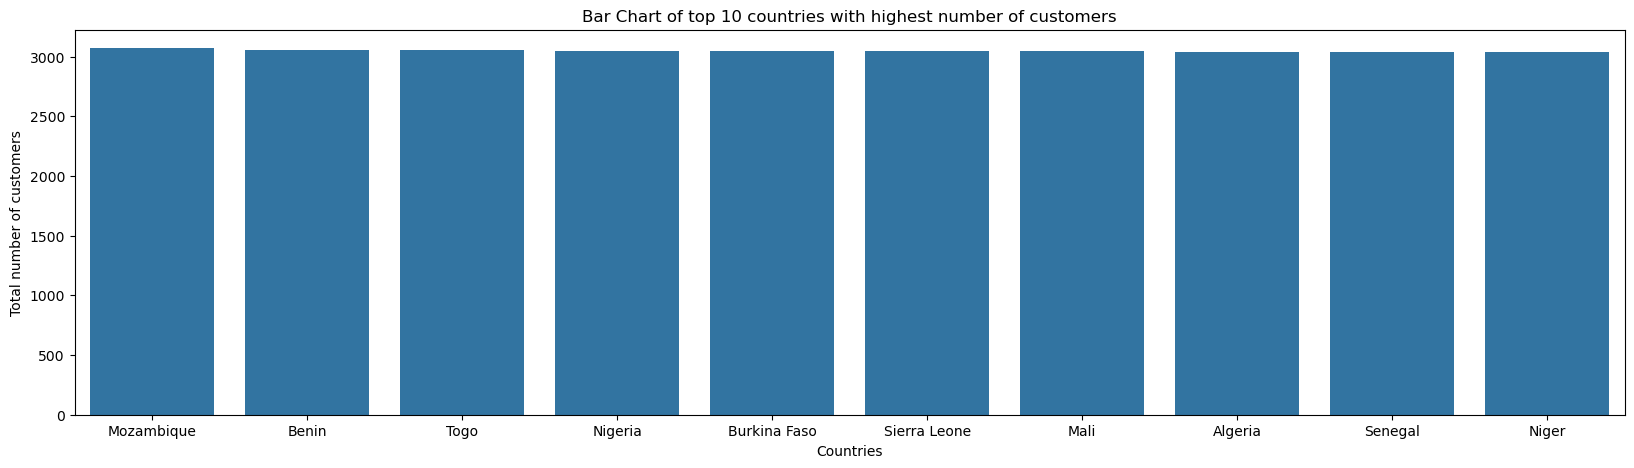

In [179]:
# Draw a plot of top 10 countries with highest number of customers (unique customerID)
top_countries_to_customers = country_to_customers.head(10)

# Create a bar chart from the selected df
plt.figure(figsize=(20, 5))

sns.barplot(x='Country', y='Number of customers', data= top_countries_to_customers)

plt.xlabel('Countries')
plt.ylabel('Total number of customers')
plt.title('Bar Chart of top 10 countries with highest number of customers')
plt.show()

## Sales trend

In [180]:
# Group the df by month and calculate the total monthly sales
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

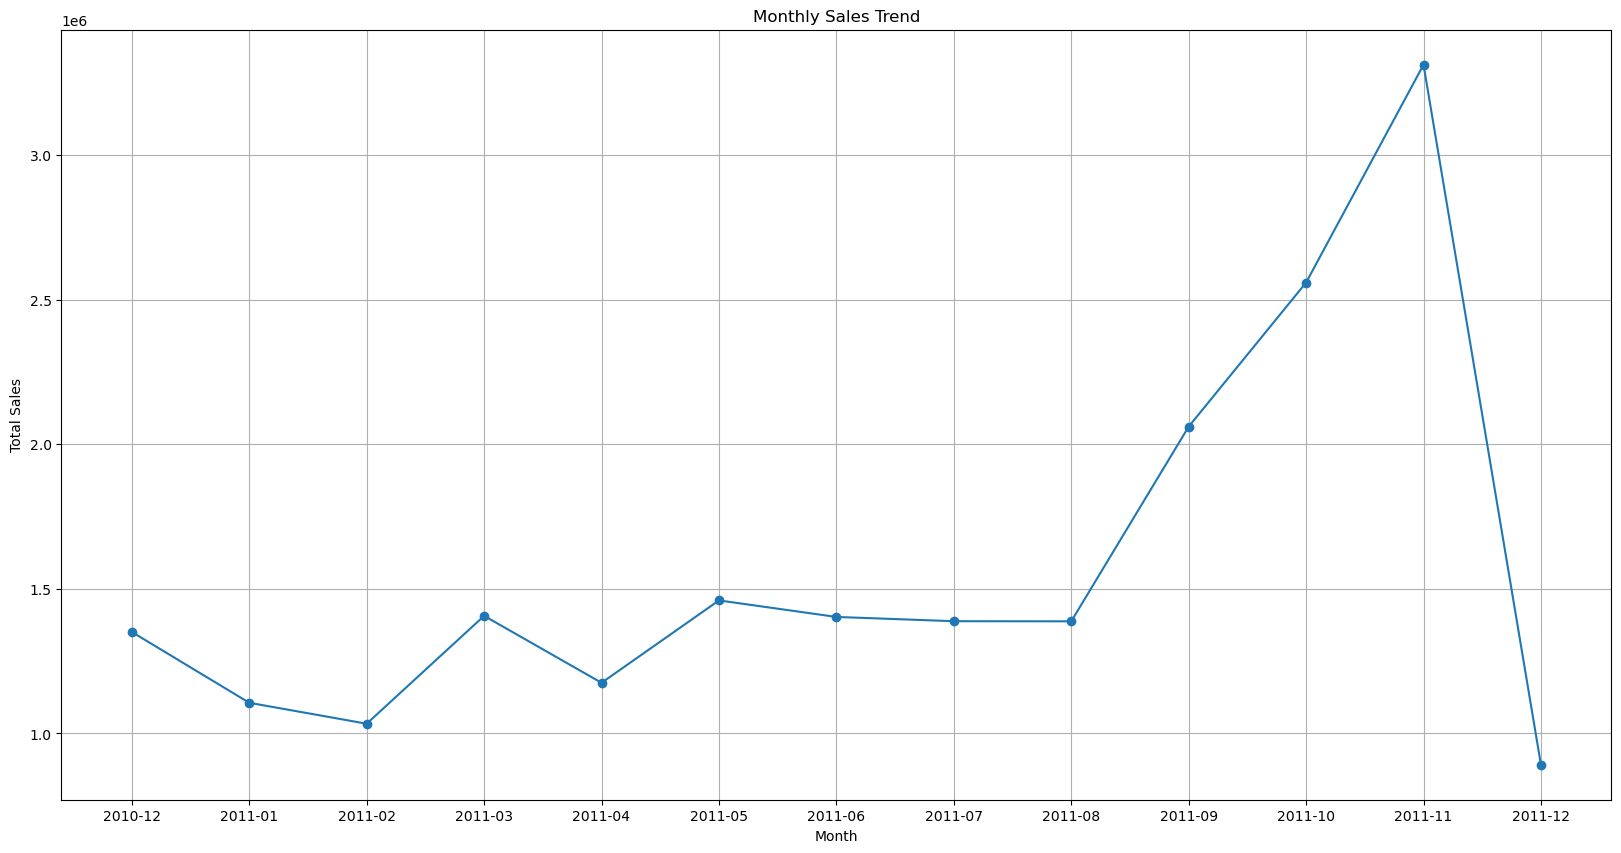

In [181]:
# Create a line chart
plt.figure(figsize=(20, 10))
plt.plot(monthly_sales.index.strftime('%Y-%m'), monthly_sales.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(True)

# Display the plot
plt.show()


**Observations**

- December 2010 to August 2011: Noticeable fluctuations in sales quantity.
- August 2011 to November 2011: A significant sales increase occurred.
- November 2011 to December 2011: Sales experienced a sudden and substantial decline.

# Cohort Analysis

In [182]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


## create cohort date

Since we are carrying out a Time-based cohort analysis, the cohorts will be grouped according to the dates they made their first purchase

and Retention rate will be calculated by analysing the months they stayed active after their first purchase

In [183]:
#create Invoice month as new feature
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [184]:
df["InvoiceDate"]  = df["InvoiceDate"].apply(get_month)
df.tail()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
406824,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique
406825,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia
406826,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia
406827,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal
406828,581587,2011-12-01,12680.0,SC9276,Toys,6,46.62,Ethiopia


In [185]:
def get_cohort_date(df):
    """ this function takes in the dataframe
        and returns the cohort date

        variables:
        df = dataframe
        cohort date = the first date they made a purchase
        """

    # assign the minimum date to all unique candidateID, i.e the first day they made a purchase
    df["cohort date"] = df.groupby("CustomerID")["InvoiceDate"].transform("min")

    return df["cohort date"]

In [186]:
#apply the function created to our dataframe and extract the 2 newly created column

df["cohort date"] = get_cohort_date(df)

In [187]:
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01
...,...,...,...,...,...,...,...,...,...
406824,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01
406825,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01
406826,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01
406827,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01


## create cohort index

A cohort index is a numerical representation that measures the time interval in months since a particular group (cohort) made their initial purchase. For example, an index of 4 indicates that this cohort made their first purchase four months ago.

This will be calculated by subtracing the time the customer made first purchase (cohort date) from the recent purchase time (invoice date)

In [188]:
#create a function that extracts the year and month from the first and last cohort date

def get_year_and_month(df, col):
    """
    This function takes in the dataframe and column,
    and returns the month and year component for that column

    Variables:
    df = dfframe
    col = column
    month = month component
    year = year component"""

    month = df[col].dt.month
    year = df[col].dt.year
    return month, year

In [189]:
# apply the fucntion on cohort first date column
first_month, first_year = get_year_and_month(df,"cohort date")

In [190]:
first_month

0         12
1         12
2         12
3         12
4         12
          ..
406824     8
406825     8
406826     8
406827     8
406828     8
Name: cohort date, Length: 406829, dtype: int32

In [191]:
# apply the function on cohort latest date column
latest_month, latest_year = get_year_and_month(df,"InvoiceDate")

In [192]:
latest_month

0         12
1         12
2         12
3         12
4         12
          ..
406824    12
406825    12
406826    12
406827    12
406828    12
Name: InvoiceDate, Length: 406829, dtype: int32

**CREATE COHORT INDEX**

In [193]:
# write a function to create cohort index
def create_cohort_index(first_month, first_year, latest_month,latest_year):
    """
    This code creates takes in the first and latest month and year
    and returns the calculated period(in months) the customer has been active

    variables:
    first_month: first month the customer made purchase
    first_year: first year the customer made purchase

    latest_month: recent month the customer made purchase
    latest_year: recent year the customer made purchase

    index: The duration between first and latest purchase (in months)"""

    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    index = year_diff*12 + month_diff +1 # +1 is added because of customers who have been active for just 1 month
    return index

In [194]:
df["cohort_index"] = create_cohort_index(first_month, first_year, latest_month, latest_year)

In [195]:
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...
406824,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,5
406825,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,5
406826,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01,5
406827,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,5


## Create a pivot table

To create a pivot table, first we need to know how many customers made a purchase each month after their first purchase

for example: How many customers from the September cohort made a purchase four months after their initial purchase in September?

### Cohort table

In [196]:
cohort_info = df.groupby(["cohort date","cohort_index"])["CustomerID"].nunique().reset_index()

In [197]:
cohort_info.rename(columns = {"CustomerID": "Number of customers"}, inplace = True)

In [198]:
cohort_info

,cohort date,cohort_index,Number of customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


### Pivot table

In [199]:
# create a pivot table

cohort_table = cohort_info.pivot(index = "cohort date", columns = ["cohort_index"], values = "Number of customers")

#change index to understandable format
cohort_table.index = cohort_table.index.strftime('%B %Y')
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January 2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February 2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March 2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April 2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May 2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort date'>

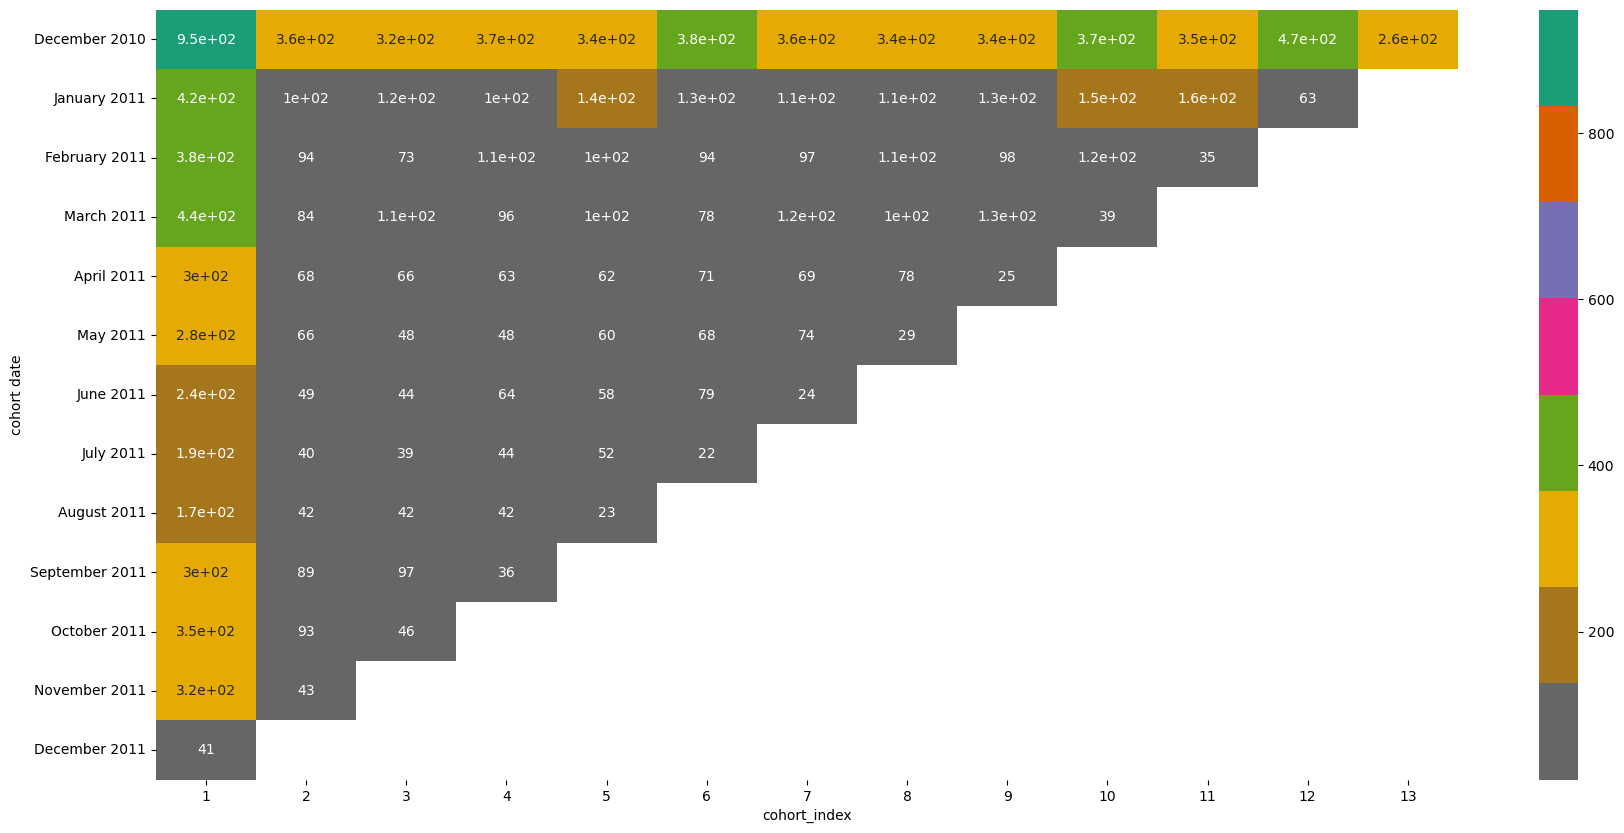

In [200]:
#visualize our results in heatmap

plt.figure(figsize = (21,10))
sns.heatmap(cohort_table, annot = True, cmap = 'Dark2_r')

**Observe retention rate**

To effeciently observe the customers rentention rate, lets plot the chart in percentage.

In [201]:
# showing retention rate in percentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis = 0)
new_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Draw heatmap**

<Axes: xlabel='cohort_index', ylabel='cohort date'>

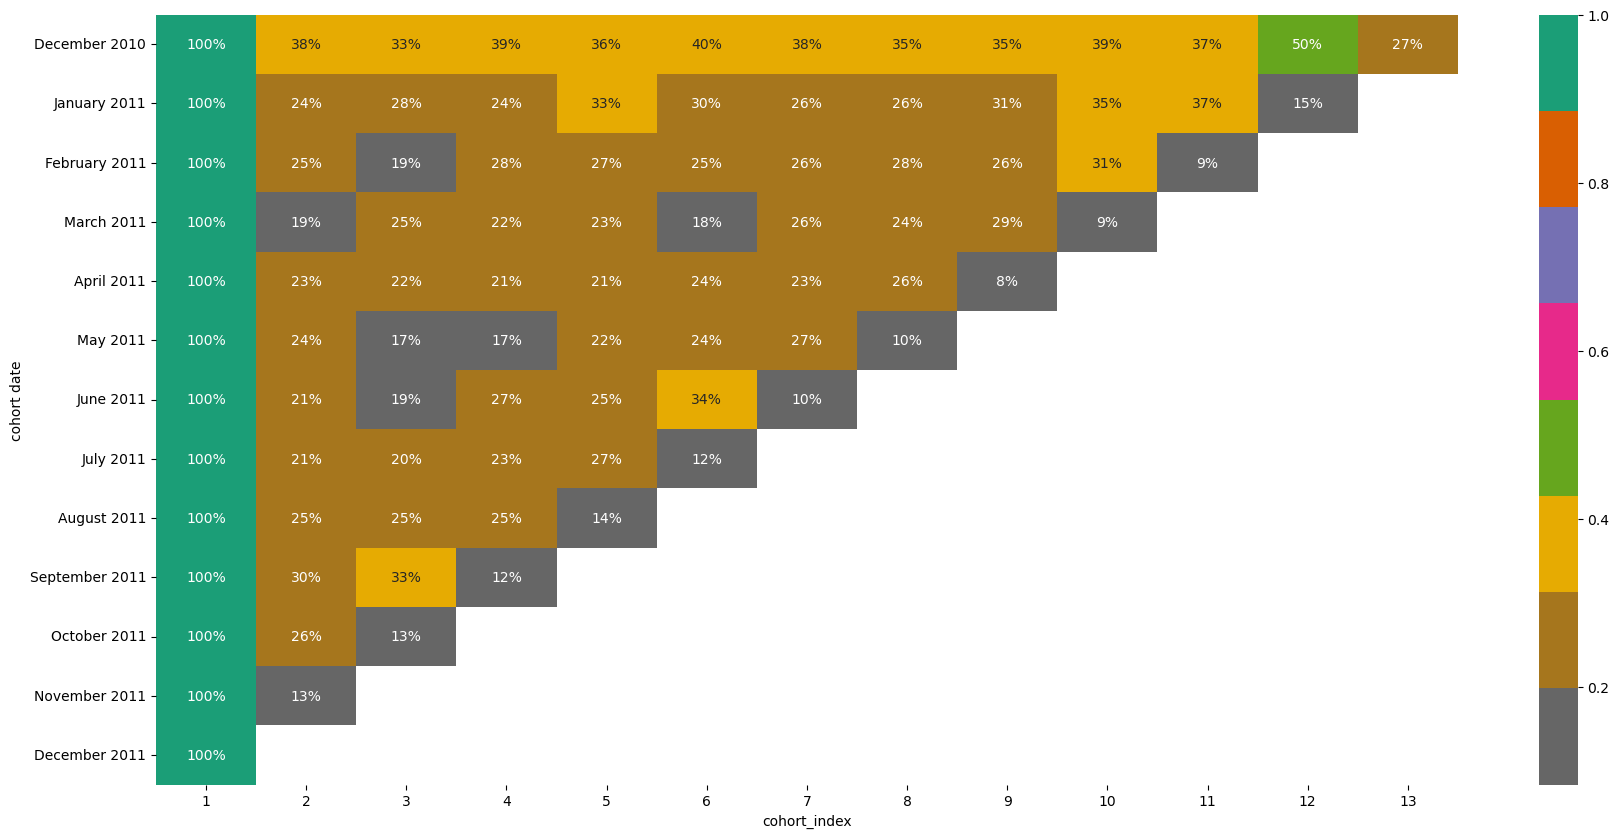

In [202]:
#visualize our results in heatmap

plt.figure(figsize = (21,10))
sns.heatmap(new_cohort_table, annot = True, cmap = 'Dark2_r', fmt = '.0%')

The heatmap above illustrates the customer retention rates for each cohort.

**OBSERVATIONS**

A healthy retention rate for e-commerce platforms is typically considered to be in the range of **20% to 40%.** This means that **20% to 40%** of your customers continue to make purchases from your e-commerce platform after their initial purchase.

- **December 2010 Cohort Outperforms Others:** The fact that the **December 2010** cohort has a retention rate above **30%** is a positive sign. It suggests that this group of customers has remained engaged with your e-commerce platform over time. This could be due to various factors, such as the quality of your products/services, effective marketing, or a strong customer retention strategy.

- **Decline in December 2011:** The observation that all cohorts have low retention rates in December 2011 suggests that there may have been specific challenges or issues affecting customer retention during that time. It's important to investigate what might have caused this decline and whether it's a one-time event or a recurring pattern

- **Variability in Retention Rates:** The range of retention rates, from a **minimum of 8% to a maximum of 50%**, suggests that there is significant variability in how different cohorts of customers are behaving. While 8% is relatively low, 50% is relatively high, considering the standard e-commerce retention rates mentioned earlier.

**RECOMMENDATIONS**

- **Identify Factors Driving High Retention (December 2010):** Analyze what factors have contributed to the high retention rate for the December 2010 cohort. Was there a specific marketing campaign, product improvement, or customer engagement strategy that worked well for this group? Try to replicate successful strategies for other cohorts.

- **Investigate December 2011 Drop:** Investigate why all cohorts have low retention rates on December 2011. It might involve analyzing customer feedback, product quality, customer service, or any changes in your business operations during that time. Identifying and addressing the root causes of this drop is crucial for improving future retention rates.

- **Set Realistic Targets:** While the standard e-commerce retention rate range is 20% to 40%, it's essential to set targets that are specific to your business and its circumstances. Aim to improve retention rates gradually over time based on your historical df and industry benchmarks.

- **Implement Retention Strategies:** Develop and implement retention strategies that are tailored to different cohorts of customers. Personalized marketing, loyalty programs, and targeted communication can help improve retention rates.

- **Continuously Monitor and Adapt:** Retention rates can change over time due to various factors, so it's crucial to continuously monitor them and adapt your strategies accordingly. Regularly analyzing cohort df and customer behavior will help you make informed decisions to improve retention.

In addtion to observing the behaviour of each cohort, we can create a table which shows the average quantity of product bought by each cohort and how it fluctuates.

**Average quantity bought**

In [203]:
average_quantity = df.groupby(["cohort date", "cohort_index"])["Quantity"].mean().reset_index()
average_quantity["Quantity"] = average_quantity["Quantity"].round(1)

In [204]:
average_quantity.rename(columns = {"Quantity": "average quantity"}, inplace = True)

In [205]:
average_quantity

,cohort date,cohort_index,average quantity
0,2010-12-01,1,50.3
1,2010-12-01,2,50.3
2,2010-12-01,3,50.4
3,2010-12-01,4,50.6
4,2010-12-01,5,50.6
...,...,...,...
86,2011-10-01,2,49.9
87,2011-10-01,3,49.4
88,2011-11-01,1,51.1
89,2011-11-01,2,48.6


In [206]:
# create a pivot table

quantity_table = average_quantity.pivot(index = "cohort date", columns = ["cohort_index"], values = "average quantity")

#change index to understandable format
quantity_table.index = quantity_table.index.strftime('%B %Y')
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,50.3,50.3,50.4,50.6,50.6,50.4,50.5,50.5,50.2,50.6,50.5,50.6,50.7
January 2011,50.7,50.6,50.8,50.6,50.9,50.4,50.3,50.4,50.5,49.9,50.6,50.5,NaN
February 2011,51.2,49.7,51.0,50.3,50.2,50.7,49.2,50.7,50.9,49.6,50.1,NaN,NaN
March 2011,50.5,50.2,50.2,50.2,50.1,50.6,50.0,51.1,50.1,50.4,NaN,NaN,NaN
April 2011,50.7,49.9,50.0,50.1,50.6,50.3,50.3,49.9,51.1,NaN,NaN,NaN,NaN
May 2011,50.7,49.4,50.2,49.7,51.2,50.5,49.9,51.4,NaN,NaN,NaN,NaN,NaN
June 2011,50.6,51.0,48.5,50.6,51.4,50.9,50.3,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,50.7,49.5,50.8,50.1,49.8,50.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,50.5,49.8,50.4,51.0,50.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort date'>

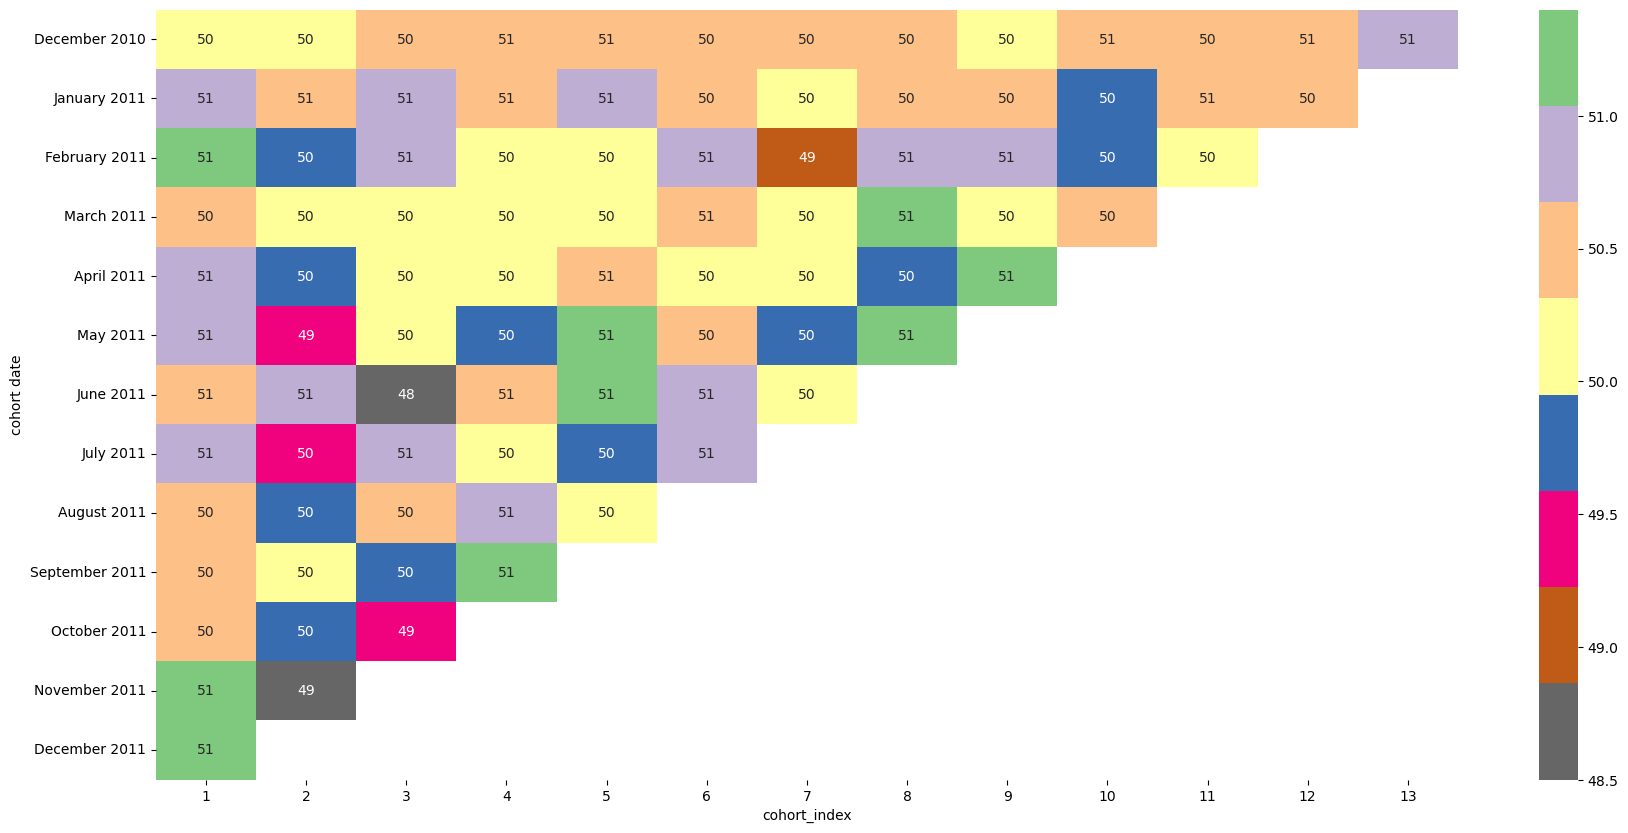

In [207]:
#visualize our results in heatmap

plt.figure(figsize = (21,10))
sns.heatmap(quantity_table, annot = True, cmap = 'Accent_r')

**Observations**

Although there is significant drop in customer retention after their first month as observed on the previous chart, the average quantity bought is not experiencing much fluctuations. Meaning there is possibiity that a few customers tends to puchase alot of product, therefore maintaining the average value

**Recommendation**

This can serve as a signal to carryout targetted marketing in countries where more quantites are sold in contrast to targeting countries where more customers are acquired.

## Customer Segmentation Analysis Using Kmeans

In [208]:
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...
406824,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,5
406825,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,5
406826,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01,5
406827,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,5


In [214]:
# Find the latest purchase date in the dataset
latest_date = df['InvoiceDate'].max()

# Create aggregated features
df_agg = df.groupby('CustomerID').agg({
    'Quantity': 'sum',                     # Total quantity purchased
    'UnitPrice': 'mean',                   # Average unit price
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency (days since last purchase)
}).rename(columns={'InvoiceDate': 'Recency'})

# Reset index
df_agg.reset_index(inplace=True)

In [215]:
# Display the result
df_agg

,CustomerID,Quantity,UnitPrice,Recency
0,12346.0,119,50.945000,334
1,12347.0,8511,49.460659,0
2,12348.0,1539,55.091613,91
3,12349.0,3434,53.135342,30
4,12350.0,917,53.750000,303
...,...,...,...,...
4367,18280.0,495,46.134000,275
4368,18281.0,379,59.127143,183
4369,18282.0,786,40.731538,0
4370,18283.0,40533,49.920384,0


In [216]:
##Standardize the data

# from sklearn.preprocessing import StandardScaler

# Select the features for clustering
features = ['Quantity', 'UnitPrice', 'Recency']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_agg[features])

#### Step 2: Determine the Optimal Number of Clusters
- Use the Elbow Method to identify the optimal number of clusters.

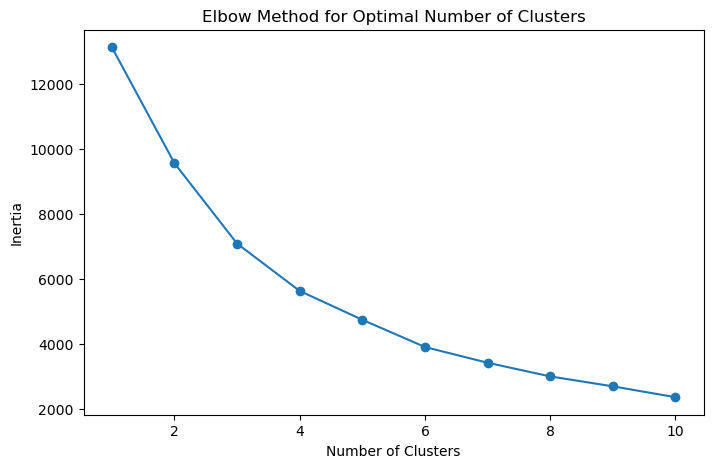

In [217]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

- The optimal number of clusters (k) is determined by identifying the "elbow point" in the graph. The elbow point is where the rate of decrease in inertia slows down significantly, meaning adding more clusters doesn't result in a significant reduction in inertia.

- From the Graph:
The inertia decreases rapidly from 1 to 3 clusters.
After 3 clusters, the reduction in inertia slows down, indicating diminishing returns.

- Optimal k:
The optimal k is 3 because it represents a good trade-off between reducing inertia and avoiding overly complex models. Beyond k=3, the improvements in cluster separation are marginal compared to the increase in model complexity.

#### Apply K-means clustering

In [218]:
# Apply K-Means with the chosen number of clusters
optimal_k = 3  # Replace with the number from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_agg['Cluster'] = kmeans.fit_predict(scaled_data)

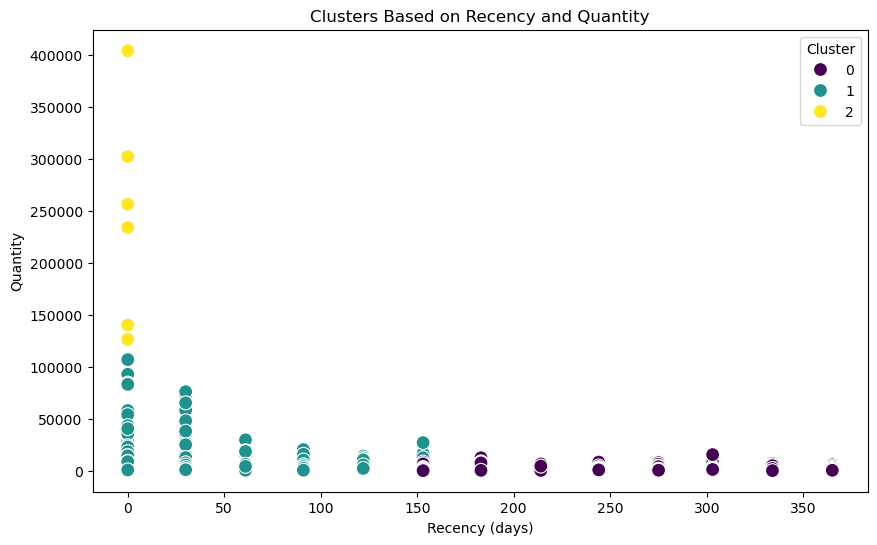

In [219]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_agg, x='Recency', y='Quantity', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters Based on Recency and Quantity')
plt.xlabel('Recency (days)')
plt.ylabel('Quantity')
plt.legend(title='Cluster')
plt.show()

In [220]:
cluster_summary = df_agg.groupby('Cluster').mean()
print(cluster_summary)

           CustomerID       Quantity  UnitPrice     Recency
Cluster                                                    
0        15356.982699    1444.218858  50.259558  246.962803
1        15279.752648    5421.242679  50.344652   43.743302
2        14918.833333  244066.666667  50.424304    0.000000



#### Key Takeaways:
- Cluster 2:

This cluster represents customers with extremely high purchase quantities and recency of 0 (most recent buyers). These are your high-value customers or VIPs, and they are critical for the business.
Represents your most valuable customers who have purchased the most recently and in very high quantities. These customers should be prioritized for retention strategies such as personalized promotions, rewards, or exclusive benefits.
- Cluster 1:

Customers here purchase more frequently, have a low recency (recently purchased), and also spend moderately. These are your loyal or active customers with good engagement. These are loyal customers who make frequent purchases but in moderate quantities. Keeping them engaged through consistent follow-ups, loyalty programs, or newsletters can improve their lifetime value.
- Cluster 0:

Customers in this cluster purchase fewer items, have a high recency (haven't bought recently), and spend moderately. These are low-value customers or customers who may be at risk of churn. These customers are either at risk of churn or inactive. Efforts should be directed toward re-engaging them through reminders, discounts, or feedback collection to understand their reasons for inactivity.

In [232]:
# Add cluster labels to the dataset to see the customers in each cluster
df_agg['Cluster'] = kmeans.labels_

# Display the dataset with the new column
df_agg

,CustomerID,Quantity,UnitPrice,Recency,Cluster
0,12346.0,119,50.945000,334,0
1,12347.0,8511,49.460659,0,1
2,12348.0,1539,55.091613,91,1
3,12349.0,3434,53.135342,30,1
4,12350.0,917,53.750000,303,0
...,...,...,...,...,...
4367,18280.0,495,46.134000,275,0
4368,18281.0,379,59.127143,183,0
4369,18282.0,786,40.731538,0,1
4370,18283.0,40533,49.920384,0,1


In [237]:
# Count the number of customers in each cluster
cluster_counts = df_agg['Cluster'].value_counts()

# Display the counts
print(cluster_counts)


Cluster
1    3210
0    1156
2       6
Name: count, dtype: int64


In [236]:
# Filter the dataset for customers in cluster 2
cluster_2_customers = df_agg[df_agg['Cluster'] == 2]

# Display the customers
print(cluster_2_customers)


      CustomerID  Quantity  UnitPrice  Recency  Cluster
330      12748.0    234200  50.371853        0        2
1300     14096.0    256573  50.546716        0        2
1674     14606.0    140207  50.898343        0        2
1895     14911.0    302503  50.733881        0        2
2192     15311.0    126506  49.959233        0        2
4042     17841.0    404411  50.035796        0        2


In [239]:
# Merge the cluster labels back to the original dataset
df_with_clusters = df.merge(df_agg[['CustomerID', 'Cluster']], on='CustomerID')

# Analyze the products customers in each cluster typically go for
products_by_cluster = df_with_clusters.groupby('Cluster')['Description'].value_counts().groupby(level=0).head(5)
print("Top 5 products for each cluster:\n", products_by_cluster)


Top 5 products for each cluster:
 Cluster  Description     
0        Kitchenware          3403
         Toys                 3403
         Furniture            3397
         Sports Equipment     3353
         Cloths               3332
1        Jewelry             34853
         Sports Equipment    34810
         Shoes               34559
         Furniture           34484
         Toys                34448
2        Shoes                2990
         Toys                 2978
         Kitchenware          2939
         Cosmetics            2936
         Furniture            2889
Name: count, dtype: int64


In [243]:
# Get the top 5 countries for each cluster
top_countries_by_cluster = df_with_clusters.groupby('Cluster')['Country'].value_counts().groupby(level=0).head(5)

# Display the top 5 countries for each cluster
print(top_countries_by_cluster)

Cluster  Country     
0        Sierra Leone     1242
         Egypt            1239
         Senegal          1227
         Sudan            1226
         Tunisia          1223
1        Nigeria         12486
         Zimbabwe        12471
         Somalia         12443
         Togo            12438
         Ghana           12424
2        Ethiopia         1099
         Libya            1092
         Cameroon         1086
         Sierra Leone     1081
         Uganda           1080
Name: count, dtype: int64


### Top Products for Each Cluster
#### Cluster 0:
- The most purchased items include **kitchenware**, **toys**, and **furniture**, showing interest in household goods.
- This cluster seems to focus on practical or everyday-use items, likely indicating families or individuals setting up homes.

#### Cluster 1:
- **Jewelry**, **clothes**, and **shoes** dominate this cluster.
- This cluster could represent fashion-forward or luxury-seeking customers, with preferences for apparel and accessories.

#### Cluster 2:
- **Shoes**, **toys**, and **kitchenware** are prominent.
- This cluster might represent a mix of family-oriented customers focusing on children’s needs and practical items for their households.

---

### Top Countries for Each Cluster
#### Cluster 0:
- Countries like **Sierra Leone**, **Egypt**, and **Senegal** are the most represented.
- This cluster's geographic distribution may indicate regions where household goods are in high demand.

#### Cluster 1:
- **Nigeria**, **Zimbabwe**, and **Somalia** have the highest counts in this cluster.
- These countries may have a higher demand for fashion and luxury items based on the product trends in this cluster.

#### Cluster 2:
- **Ethiopia**, **Libya**, and **Cameroon** dominate this cluster.
- These regions might represent customers with diverse needs, as shown by the mix of household and children-oriented products.

---

### Key Insights:
1. **Cluster-based Personalization**:
   - Tailor marketing strategies for each cluster, such as promoting household products to Cluster 0 and fashion accessories to Cluster 1.
   
2. **Geographic Segmentation**:
   - Focus regional campaigns on countries with higher representation in each cluster.

3. **Retention Strategies**:
   - Use this information to develop loyalty programs, personalized discounts, or targeted advertisements to cater to each cluster's unique preferences.